# 1. OR Gate 학습 및 시각화 (ANN)

In [6]:
import torch                              
import torch.nn as nn                     
import torch.optim as optim               
import matplotlib.pyplot as plt           
import numpy as np                        

# OR 게이트 데이터
# X
X = torch.Tensor([[0, 0],                  
                  [0, 1],
                  [1, 0],
                  [1, 1]])
# y
y = torch.Tensor([[0],                    
                  [1],
                  [1],
                  [1]])

class ANN(nn.Module):
    def __init__(self):
        super().__init__()
        
        # 은닉층 1개: 2→2→1
        self.model = nn.Sequential(
            nn.Linear(2, 2),  # input 2d → hidden 2유닛
            nn.Sigmoid(), # 은닉층 시그모이드 활성화함수
            nn.Linear(2, 1), # hidden 2유닛 → output 1유닛
            nn.Sigmoid()  # 출력 시그모이드 활성화 함수
        )
    
    # 순전파
    def forward(self, x): 
        return self.model(x)             

model = ANN()                              # 모델 인스턴스 생성

# 손실 함수 및 옵티마이저 설정
criterion = nn.BCELoss()    # 이진 분류용 손실 함수
optimizer = optim.SGD(model.parameters(), lr=0.1)  # 확률적 경사하강법을 활용해 optimizing 진행

history = []


for epoch in range(1000):                
    optimizer.zero_grad()                
    outputs = model(X) #순전파 
    loss = criterion(outputs, y) #손실 계산
    loss.backward()   # 역전파 -> 기울기 계산
    optimizer.step()  
    history.append(loss.item())  # loss update


with torch.no_grad():                    # 기울기 계산 비활성화
    pred = (model(X) > 0.5).float()      # 예측을 0 또는 1로 변환
    print("예측값:\n", pred.cpu().numpy())


예측값:
 [[0.]
 [1.]
 [1.]
 [1.]]


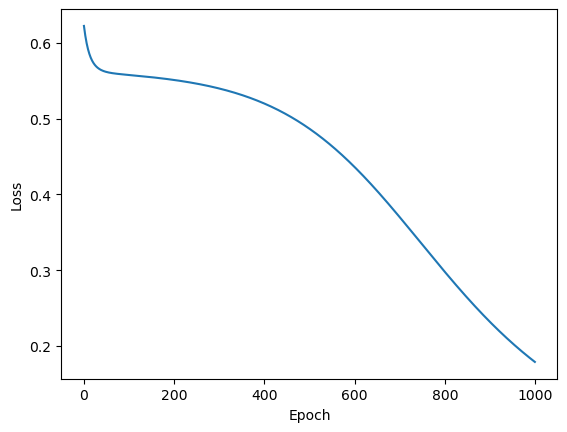

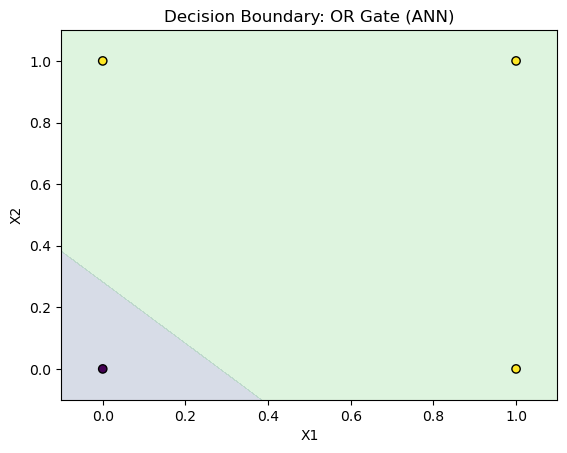

In [7]:
# 손실 곡선 시각화
plt.plot(history)                       
plt.xlabel('Epoch')                     
plt.ylabel('Loss')                      
plt.show()

# 결정 경계 시각화
xx, yy = np.meshgrid(
    np.arange(-0.1, 1.1, 0.01), # X축 범위
    np.arange(-0.1, 1.1, 0.01)  # Y축 범위
)
grid = torch.tensor(
    np.c_[xx.ravel(), yy.ravel()],  # 2D 그리드를 (N,2) 형태로 변환
    dtype=torch.float32
)
with torch.no_grad():                    
    zz = model(grid).reshape(xx.shape)   # 모델 예측값을 그리드 형태로 재배열

plt.contourf(xx, yy, zz, levels=[0,0.5,1], alpha=0.2)  # 등고선 채우기
plt.scatter(X[:,0], X[:,1], c=y[:,0], edgecolors='k') # 원본 데이터 점 표시
plt.title("Decision Boundary: OR Gate (ANN)")
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


# 2. XOR 게이트 학습 시도 및 한계 (ANN)

XOR 예측값:
 [[0.]
 [1.]
 [0.]
 [1.]]


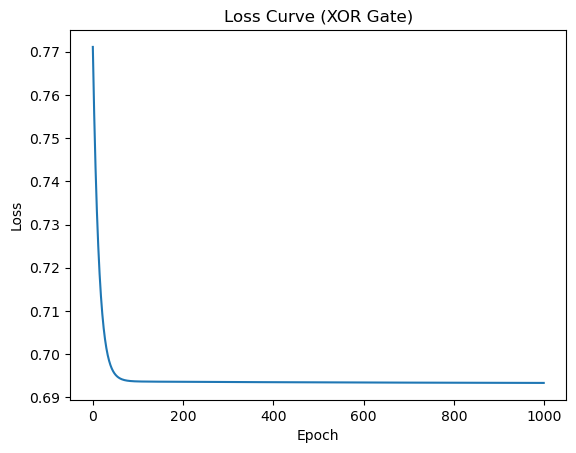

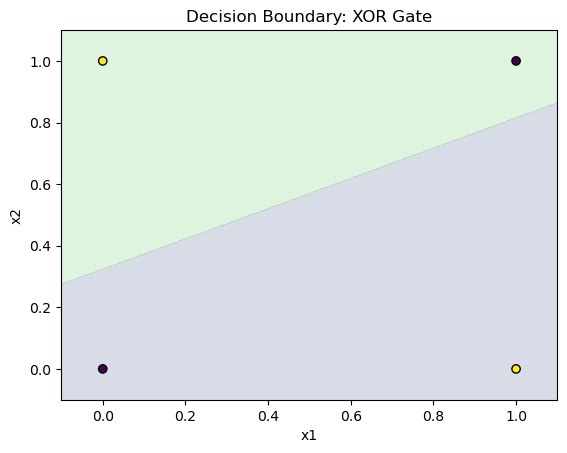

In [9]:
# XOR 데이터
X_xor = torch.Tensor([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
y_xor = torch.Tensor([[0],
                  [1],
                  [1],
                  [0]])  # 여기서 y를 y_xor로 이름 바꿔도 되고, 그냥 덮어써도 OK

# OR 게이트와 동일한 모델 사용! 코드 동일! 변수명만 변경

# 초기화
model = ANN()
optimizer = optim.SGD(model.parameters(), lr=0.1)
history = []

# 학습
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y_xor)      
    loss.backward()
    optimizer.step()
    history.append(loss.item())

# 예측 확인
with torch.no_grad():
    pred = (model(X) > 0.5).float()
    print("XOR 예측값:\n", pred.numpy())

# 손실 곡선
plt.plot(history)
plt.title("Loss Curve (XOR Gate)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# 결정 경계
xx, yy = np.meshgrid(np.arange(-0.1, 1.1, 0.01),
                     np.arange(-0.1, 1.1, 0.01))
grid = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])

with torch.no_grad():
    Z = model(grid).reshape(xx.shape).numpy()

plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y[:,0], edgecolors='k') 
plt.title("Decision Boundary: XOR Gate")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


**분리가 되지 않는 이유?**
 - Loss가 잘 떨어지지 않고, 예측값이 진리표와 달라 선형 분리로 XOR 문제는 해결이 안 됨.
 
   > XOR 문제는 비선형 분리가 필요하지만, 은닉층 1개(단순 구조)로는 선형 분리로는 해결되지 않음을 시사한다.

# XOR 게이트 학습 및 시각화 (DNN)

XOR 예측값:
 [[0.]
 [1.]
 [1.]
 [0.]]


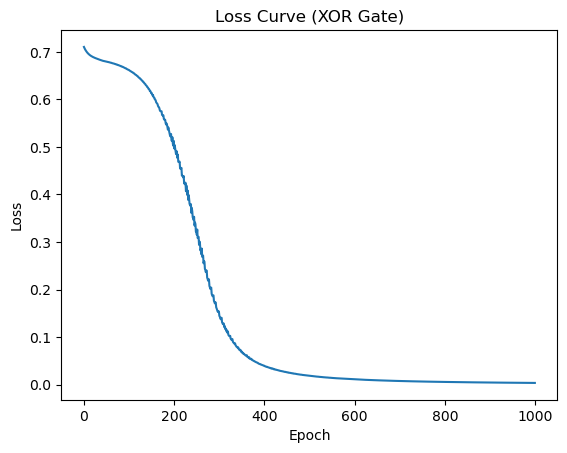

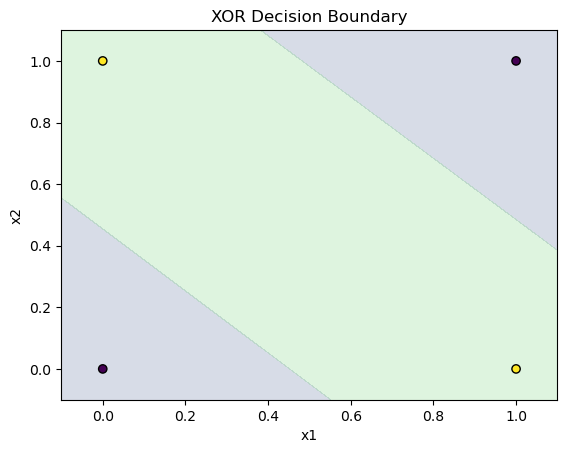

In [11]:
# 위의 X_xor, y_xor 변수 그대로 사용

# DNN 모델 생성

class DNN(nn.Module):
    def __init__(self):
        super().__init__()
        
        #은닉층 2개: 2→4→4→1
        self.net = nn.Sequential(
            nn.Linear(2, 4),    # input 2D → hidden1 4유닛
            nn.ReLU(),           # 은닉층1 ReLU 활성화
            nn.Linear(4, 4),    # hidden1 4유닛 → hidden2 4유닛
            nn.ReLU(),           # 은닉층2 ReLU 활성화
            nn.Linear(4, 1),    # hidden2 4유닛 → output 1유닛
            nn.Sigmoid()         # 출력 Sigmoid
        )
    def forward(self, x):
        return self.net(x)

model = DNN()   
optimizer = optim.SGD(model.parameters(), lr=0.1)
history = []

# 학습
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y_xor)      
    loss.backward()
    optimizer.step()
    history.append(loss.item())

# 예측 확인
with torch.no_grad():
    pred = (model(X) > 0.5).float()
    print("XOR 예측값:\n", pred.numpy())

# 손실 곡선
plt.plot(history)
plt.title("Loss Curve (XOR Gate)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# 결정 경계
xx, yy = np.meshgrid(np.arange(-0.1, 1.1, 0.01),
                     np.arange(-0.1, 1.1, 0.01))
grid = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])
with torch.no_grad():
    Z = model(grid).reshape(xx.shape).numpy()

plt.contourf(xx, yy, Z, levels=[0,0.5,1], alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y[:,0], edgecolors='k')
plt.title("XOR Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()            



**분리가 되는 이유**

- XOR 패턴은 원래 2차원 입력 공간에서 양(1)과 음(0) 클래스가 서로 교차되어 있어, 단순 선형 패턴으로는 두 클래스를 완벽히 분리할 수 없었으나, DNN의 은닉층에 삽입된 비선형 활성화 함수는 입력을 고차원 특징 공간으로 매핑해 원래 섞여 있던 클래스들이 분리된 영역으로 재배치되도록 만들어줘 이러한 분리가 DNN으로는 가능하게 되는 것이다. 즉, 비선형성을 추가해줬기 때문에 이러한 분리가 가능하게 된 것이다.